In [1]:
from itertools import product

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats

#### Глава 3
##### Сравнение нескольких групп: дисперсионный анализ

ANOVA (Aalysis of Variance)

### Формулы

Однофакторный дисперсионный анализ является обобщением критерия Стьюдента для проверки равенства средних двух ГС на случай нескольких ГС.

Гипотезы:
* $H_0: m_1=m_2=...=m_k$ все средние равны (исслед. факторы не оказ. никакого влияния и полученные различия случайны)
* $H_1$: не все средние равны

Анализ основан на сравнении межгрупповой и внутригрупповой дисперсий.

$k$ - число исследуемых групп

$n=\displaystyle\sum_{i=1}^{k} n_i$, где $n_i$ - численность i-й группы.

Межгрупповая сумма квадратов отклонений (Sum Square Between Groups):

$SS_b = \displaystyle\sum_{i=1}^{k} n_i(\overline x_i - \overline{\overline x})^2$

Внутригрупповая сумма квадратов отклонений (Sum Square Within Groups):

$SS_w = \displaystyle\sum_{i=1}^{k} \displaystyle\sum_{j=1}^{n_i} (x_{ij} - \overline x_i)^2$

Общая сумма квадратов отклонений (Sum Square):

$SS = \displaystyle\sum_{i=1}^{k} \displaystyle\sum_{j=1}^{n_i} (x_{ij} - \overline{\overline x})^2 = SS_b + SS_w$

Межгрупповая (факторная) дисперсия (Mean Square Between Groups):

$MS_b=\cfrac{SS_b}{k-1}$

Внутригрупповая (остаточная) дисперсия (Mean Square Within Groups):

$MW_w=\cfrac{SS_w}{n-k}$

F-статистика. $H_0$ - верна если F близка к 1, в противном случае значительно выше 1:

$F=\cfrac{MS_b}{MS_w}$

Критическое значение для $F$ определяется уровнем значимости $\alpha$ (обычно 0.05 или 0.01), межгрупповым числом степеней свободы $\nu_b=k-1$ и внутригрупповым числом степеней свободы $\nu_w=n-k$



In [31]:
def F_test(n, means, stds):
    assert len(means) == len(stds), "len(means) != len(stds)"

    # n is int, np.array, pd.Series or list
    
    if type(n) == int:
        n = np.repeat(n, len(means))
    elif type(n) == list:
        n = np.array(n)
    assert len(means) == len(n), "len(means) != len(n)"

    N = sum(n)

    # степени свободы
    vbg = len(means) - 1
    vwg = N - len(means)

    # оценка внутригрупповой и межгрупповой дисперсий
    MSbg = (n*(means - np.average(means, weights=n))**2).sum() / vbg
    MSwg = ((n - 1) * np.power(stds, 2)).sum() / vwg

    F = MSbg / MSwg

    # Определение критического уровня F
    F01 = scipy.stats.f.ppf(q=1-.01, dfn=vbg, dfd=vwg)
    F05 = scipy.stats.f.ppf(q=1-.05, dfn=vbg, dfd=vwg)

    print(f"Межгрупповая дисперсия: MSbg = {MSbg:.3f}")
    print(f"Внутригрупповая дисперсия: MSwg = {MSwg:.3f}\n")
    print(f"F = MSbg / MSwg = {F:.3f}\n")
    print(f"Межгрупповое число степеней свободы: vbg = {vbg}")
    print(f"Внутригрупповое число степеней свободы: vwg = {vwg}\n")
    print(f"Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: \n\t F01 = {F01:.3f} \n\t F05 = {F05:.3f}\n")

    if F > F01:
        print(f"Различия статистически значимы. P < 0.01 (F = {F:.3f} > F01 = {F01:.3f})")
    elif F < F05:
        print(f"Различия статистически не значимы. P > 0.05 (F = {F:.3f} < F05 = {F05:.3f})")
    else:
        print("Пограничный случай, сложно что-то сказать.")


**3.1** 

Если  при  родах  шейка  матки  долго  не  раскрывается, то продолжительность родов увеличивается и может возникнуть необходимость кесарева сечения. Ч. О’Херлихи и Г. Мак-Дональд (С. O’Herlihy, H. MacDonaid. Influence of reproduction prostaglandin E2 vaginal gel on cervical ripening and labor. Obstet. Gynесоl., 54: 708—710, 1979) решили выяснить, ускоряет ли гель с простагландином Е2 раскрытие шейки матки. В исследование вошло 2 группы  рожениц.  Роженицам  первой  группы  вводили  в  шейку матки гель с простагландином Е2, роженицам второй группы вводили гель-плацебо. В обеих группах было по 21 роженице возраст, рост и сроки беременности были примерно одинаковы. Роды в группе, получавшей гель с простагландином Е2, длились в среднем 8,5 ч (стандартное отклонение 4,7 ч), в контрольной группе — 13,9 ч (стандартное отклонение — 4,1 ч). Можно ли утверждать, что гель с простагландином Е2 сокращал продолжительность родов?

In [32]:
N = 21

df = pd.DataFrame(
    data=[[8.5, 4.7], [13.9, 4.1]], 
    index=["Treatment group", "Control group"], 
    columns=["mean", "std"]
)

display(df)

,mean,std
Treatment group,8.5,4.7
Control group,13.9,4.1


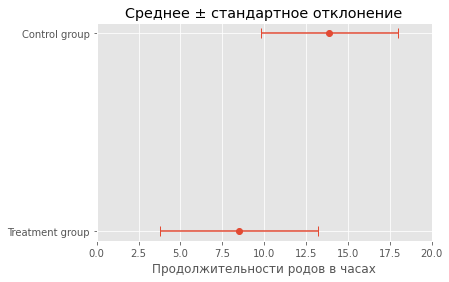

In [33]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);
ax.set_xlim(0, 20);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Продолжительности родов в часах");

In [34]:
F_test(N, df["mean"], df["std"])

Межгрупповая дисперсия: MSbg = 306.180
Внутригрупповая дисперсия: MSwg = 19.450

F = MSbg / MSwg = 15.742

Межгрупповое число степеней свободы: vbg = 1
Внутригрупповое число степеней свободы: vwg = 40

Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: 
	 F01 = 7.314 
	 F05 = 4.085

Различия статистически значимы. P < 0.01 (F = 15.742 > F01 = 7.314)


Различия  статистически  значимы. Поскольку полученное значение F (15.742) превышает критическое для данного числа степеней свободы и уровня  значимости  0.01  (7.314).

Можно  утверждать,  что  гель  с  простагландином  Е2  сокращает продолжительность родов.

**3.1** 

Курение считают основным фактором, предрасполагающим  к  хроническим  обструктивным  заболеваниям  легких.  Что касается пассивного курения, оно таким фактором обычно не считается. Дж. Уайт  и Г. Фреб усомнились в безвредности пассивного курения и исследовали проходимость дыхательных путей у некурящих,  пассивных  и  активных  курильщиков  (J.  White,  H. Froeb. Small-airways dysfunction in nonsmokers chronically exposed to tobacco smoke. N. Engl. J. Med., 302:720—723, 1980). Для характеристики состояния дыхательных путей взяли один из показателей функции внешнего дыхания — аксимальную объемную скорость середины выдоха которую измеряли во время профилактического  осмотра  сотрудников  Калифорнийского  университета в Сан-Диего. Уменьшение этого показателя — признак нарушения проходимости дыхательных путей. Данные обследования представлены в таблице. Размер каждой группы - 200 человек.

**Максимальная объемная скорость средины выдоха, л/с**

Группа|Среднее|Стандартное отклонение
-|-|-
Некурящие работающие в помещении, где не курят | 3,17 | 0,74
Некурящие работающие в накуренном помещении | 2,72 | 0,71
Курящие выкуривающие небольшое число сигарет | 2,63 | 0,73
Курящие выкуривающие среднее число сигарет | 2,29 | 0,70
Курящие выкуривающие большое число сигарет | 2,12 | 0,72

Можно  ли считать максимальную объемную скорость середины выдоха одинаковой во всех группах?

In [35]:
N = 200

df = pd.DataFrame(
    data=[[3.17, 0.74],[2.72, 0.71],[2.63, 0.73],[2.29, 0.70],[2.12, 0.72]], 
    index=pd.MultiIndex.from_tuples([
        ("Некурящие", "работающие в помещении, где не курят"), 
        ("Некурящие", "работающие в накуренном помещении"), 
        ("Курящие", "выкуривающие небольшое число сигарет"), 
        ("Курящие", "выкуривающие среднее число сигарет"), 
        ("Курящие", "выкуривающие большое число сигарет")
        ]), 
    columns=["mean", "std"]
)

display(df)

mean   std
Некурящие работающие в помещении, где не курят  3.17  0.74
          работающие в накуренном помещении     2.72  0.71
Курящие   выкуривающие небольшое число сигарет  2.63  0.73
          выкуривающие среднее число сигарет    2.29  0.70
          выкуривающие большое число сигарет    2.12  0.72

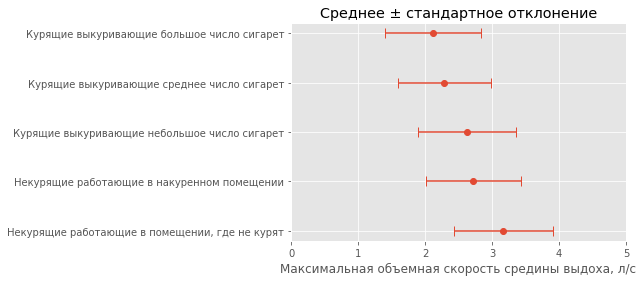

In [36]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=[' '.join(col) for col in df.index], xerr=df["std"], fmt='o', capsize=5);
ax.set_xlim(0, 5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Максимальная объемная скорость средины выдоха, л/с");

In [37]:
F_test(N, df["mean"], df["std"])

Межгрупповая дисперсия: MSbg = 33.286
Внутригрупповая дисперсия: MSwg = 0.519

F = MSbg / MSwg = 64.184

Межгрупповое число степеней свободы: vbg = 4
Внутригрупповое число степеней свободы: vwg = 995

Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: 
	 F01 = 3.338 
	 F05 = 2.381

Различия статистически значимы. P < 0.01 (F = 64.184 > F01 = 3.338)


Различия статистически значимы.

F = 64.184 > F01 = 3.338

Максимальную объемную скорость середины выдоха нельзя считать одинаковой во всех группах, Р < 0,01.

**3.3.**

Низкий  уровень  холестерина  липопротеидов  высокой плотности  ( ХЛПВП)    —  фактор  риска  ишемической  болезни сердца. Некоторые исследования свидетельствуют, что физическая нагрузка может повысить уровень ХЛПВП. Дж. Хартунг и соавт. (G. Н. Hartung et al. Relation of diet to hidh-density liрoprotein cholesterol in middle-aged marathon runners, joggles, and inactive men. N. Engl. J. Med., 302:357—361, 1980) исследовали уровень ХЛПВП у бегунов-марафонцев, бегунов трусцой и лиц, не занимающихся спортом. Средний уровень ХЛПВП у лиц, не занимающихся спортом, составил 43,3 мг% (стандартное отклонение 14,2 мг%), у бегунов трусцой — 58,0 мг% (стандартное отклонение 17,7 мг%) и у марафонцев — 64,8 мг% (стандартное отклонение 14,3 мг%). Будем считать, что в каждой группе было по 70 человек. Оцените статистическую значимость различий между группами.


In [38]:
N = 70

df = pd.DataFrame(
    data=[[43.3, 14.2], [58.0, 17.7], [64.8, 14.3]], 
    index=["Не занимаются спортом", "Бегуны трусцой", "Марафонцы"], 
    columns=["mean", "std"]
)

display(df)

,mean,std
Не занимаются спортом,43.3,14.2
Бегуны трусцой,58.0,17.7
Марафонцы,64.8,14.3


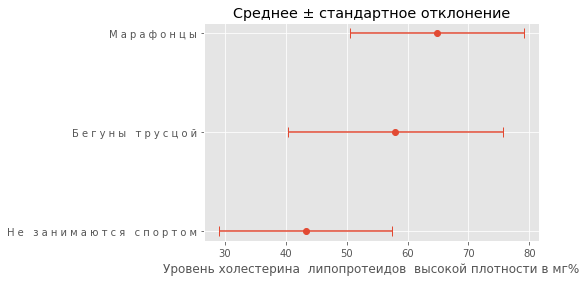

In [39]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=[' '.join(x) for x in df.index], xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Уровень холестерина  липопротеидов  высокой плотности в мг%");

In [40]:
F_test(N, df["mean"], df["std"])

Межгрупповая дисперсия: MSbg = 8453.433
Внутригрупповая дисперсия: MSwg = 239.807

F = MSbg / MSwg = 35.251

Межгрупповое число степеней свободы: vbg = 2
Внутригрупповое число степеней свободы: vwg = 207

Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: 
	 F01 = 4.709 
	 F05 = 3.040

Различия статистически значимы. P < 0.01 (F = 35.251 > F01 = 4.709)


**3.4.**

Марихуана  —  наркотик,  поэтому  исследовать  курение марихуаны на добровольцах невозможно. Исследования такого рода проводят на лабораторных животных. Г. Хубер и соавт. (G. Huber et al. Marijuana, tetrahydrocannabinol, and pulmonary arterial antibacterial  defenses.  Chest,  77:403—410,  1980)  изучали  влияние  марихуаны  на  антибактериальную  защиту  у  крыс.  После ингаляционного  введения  бактерий  крыс  помещали  в  камеру, где специальная машина окуривала их сигаретами с марихуа ной. Забив крыс, исследователи извлекали легкие и подсчитывали процент погибших бактерий, который и служил показателем состояния антибактериальной защиты. Чтобы установить, что именно влияет на антибактериальную защиту — тетрагидроканнабинолы (вещества, которые обусловливают наркотическое действие марихуаны) или просто дым одну из групп окуривали сигаретами, из которых тетрагидроканнабинолы были удалены. В каждой группе было по 36 крыс. Являются ли различия статистически значимыми?

Число сигарет | Среднее | Стандартная ошибка среднего
-|-|-
0 (контроль) | 85,1 | 0,3
15 | 83,5 | 1,0
30 | 80,9 | 0,6
50 | 72,6 | 0,7
75 | 60 | 1,3
75  (тетрагидроканнабинота  удалены) | 73,5 | 0,7
150 | 63,8 | 2,6

In [41]:
N = 36

df = pd.DataFrame(
    data=[[85.1, 0.3], [83.5, 1.0], [80.9, 0.6], [72.6, 0.7], [60.0, 1.3], [73.5, 0.7], [63.8, 2.6]],
    index=["0 (контроль)", "15", "30", "50", "75", "75 (тетрагидроканнабинота  удалены)", "150"], 
    columns=["mean", "SEM"]
)

df["std"] = df["SEM"] * 6 # sqrt(36)

display(df)

,mean,SEM,std
0 (контроль),85.1,0.3,1.8
15,83.5,1.0,6.0
30,80.9,0.6,3.6
50,72.6,0.7,4.2
75,60.0,1.3,7.8
75 (тетрагидроканнабинота удалены),73.5,0.7,4.2
150,63.8,2.6,15.6


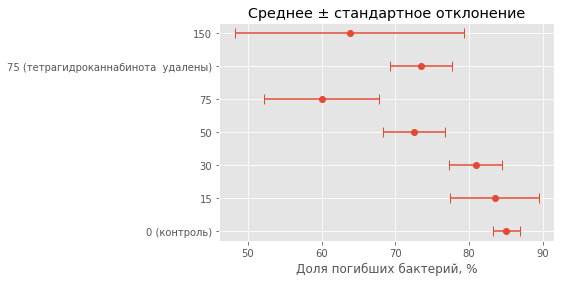

In [42]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Доля погибших бактерий, %");

In [43]:
F_test(N, df["mean"], df["std"])

Межгрупповая дисперсия: MSbg = 3378.240
Внутригрупповая дисперсия: MSwg = 55.954

F = MSbg / MSwg = 60.375

Межгрупповое число степеней свободы: vbg = 6
Внутригрупповое число степеней свободы: vwg = 245

Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: 
	 F01 = 2.876 
	 F05 = 2.136

Различия статистически значимы. P < 0.01 (F = 60.375 > F01 = 2.876)


**3.5.**

Стремясь отделить действие тетрагидроканнабинолов от действия дыма, Г. Хубер и соавт. изучили их действие при внутривенном введении. После ингаляционного введения бактерий крысам  вводили  спиртовой  раствор  тетрагидроканнабинолов, контрольной группе вводили этиловый спирт. В обеих группах было по 36 животных. После введения тетрагидроканнабинолов доля погибших бактерий составила в среднем 51,4%, в контрольной группе — 59,4%. Стандартные ошибки среднего составили соответственно 3,2% и 3,9%. Позволяют ли эти данныеутверждать, что тетрагидроканнабинолы ослабляют антибактериальную защиту?

In [44]:
N = 36

df = pd.DataFrame(
    data=[[51.4, 3.2], [59.4, 3.9]],
    index=["Treatment group",  "Control group"], 
    columns=["mean", "SEM"]
)

df["std"] = df["SEM"] * 6 # sqrt(36)

display(df)

,mean,SEM,std
Treatment group,51.4,3.2,19.2
Control group,59.4,3.9,23.4


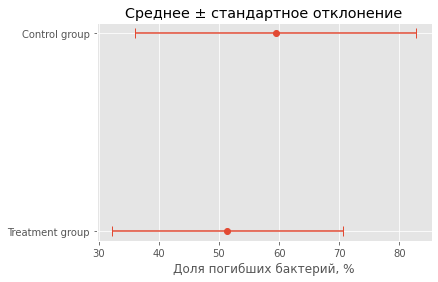

In [45]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Доля погибших бактерий, %");

In [46]:
F_test(N, df["mean"], df["std"])

Межгрупповая дисперсия: MSbg = 1152.000
Внутригрупповая дисперсия: MSwg = 458.100

F = MSbg / MSwg = 2.515

Межгрупповое число степеней свободы: vbg = 1
Внутригрупповое число степеней свободы: vwg = 70

Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: 
	 F01 = 7.011 
	 F05 = 3.978

Различия статистически не значимы. P > 0.05 (F = 2.515 < F05 = 3.978)


**3.6.**

Работа медицинской сестры сопряжена с постоянным напряжением и тяжелыми переживаниями. Груз ответственности, не уравновешенной правом принимать решения, рождает чувство усталости, раздражения и безысходности, интересная некогда работа становится ненавистным бременем. Этот синдром не совсем точно называют опустошенностью. Считается, что его развитию особенно подвержены медицинские сестры, которые работают с наиболее тяжелыми больными. Чтобы проверить это предположение, Э. Кин и соавт. (A. Keane et al. Stress in ICU and non-ICU  nurses.  Nurs.  Res.,  34:231—236,  1985)  провели  опрос медицинских сестер с помощью специально разработанного опросника, позволяющего оценить опустошенность в баллах. Медицинских  сестер  разделили  на  три  группы  в  зависимости  от тяжести состояния больных, с которыми они работали (1-я группа — наиболее тяжелые больные, 3-я — самые легкие). Далее каждую  группу  разделили  на  две  —  медицинские  сестры  хирургических и терапевтических отделений, таким образом, получилось 6 групп по 16 медицинских сестер в каждой. Являются ли различия между 6 группами статистически значимыми?

_|Гр.1 Хир.|Гр.1 Тер.|Гр.2 Хир.|Гр.2 Тер.|Гр.3 Хир.|Гр.3 Тер.
-|-|-|-|-|-|-
Среднее|49.9|51.2|57.3|46.4|43.9|65.2
Стандартное отклонение|14.3|13.4|14.9|14.7|16.5|20.5

In [47]:
N = 16

df = pd.DataFrame(
    data=[[49.9, 51.2, 57.3, 46.4, 43.9, 65.2], [14.3, 13.4, 14.9, 14.7, 16.5, 20.5]],
    index=["mean", "std"], 
    columns=pd.MultiIndex.from_tuples(product([f"Группа {n}" for n in "123"], ["Хир.", "Тер."]))
)

display(df)

Группа 1       Группа 2       Группа 3      
         Хир.  Тер.     Хир.  Тер.     Хир.  Тер.
mean     49.9  51.2     57.3  46.4     43.9  65.2
std      14.3  13.4     14.9  14.7     16.5  20.5

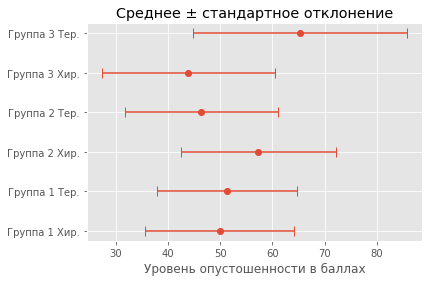

In [48]:
fig, ax = plt.subplots()

plt.errorbar(x=df.loc["mean"], y=[" ".join(x) for x in df.columns], xerr=df.loc["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Уровень опустошенности в баллах");

In [49]:
F_test(N, df.loc["mean"], df.loc["std"])

Межгрупповая дисперсия: MSbg = 971.995
Внутригрупповая дисперсия: MSwg = 252.442

F = MSbg / MSwg = 3.850

Межгрупповое число степеней свободы: vbg = 5
Внутригрупповое число степеней свободы: vwg = 90

Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: 
	 F01 = 3.228 
	 F05 = 2.316

Различия статистически значимы. P < 0.01 (F = 3.850 > F01 = 3.228)


**3.7.**

Нитропруссид натрия и дофамин — препараты, которые широко  используют  при  инфаркте  миокарда  (Инфаркт миокарда развивается вследствие закупорки одной из коронарных артерий. Кровь перестает поступать к тому или иному участку миокарда, который в результате отмирает от недостатка кислорода). Считается, что нитропруссид натрия облегчает работу сердца и тем самым снижает потребность миокарда в кислороде; в результате устойчивость миокарда к недостаточному кровоснабжению повышается. Дофамин препятствует падению артериального давления и увеличивает поступление крови к пораженному участку через дополнительные сосуды (так называемые коллатерали). К. Шатни и соавт. (C. Shatney et al. Effects of infusion of dopamine and nitroprusside on size of experimental myocardial infarction. Chest., 73:850—856, 1978) сравнили эффективность этих  препаратов  в  опытах  на  собаках  с  инфарктом  миокарда. Инфаркт миокарда вызывали перевязкой коронарной артерии, после чего вводили препарат (собакам контрольной группы вводили физиологический раствор). Через 6 часов собак забивалии взвешивали пораженный участок миокарда, результат выражали в процентах от веса левого желудочка. Препарат для каждой собаки выбирали случайным образом. Исследователь, взвешивавший  миокард,  не  знал,  какой  препарат  вводили  собаке. Полученные данные приведены в таблице (Вес пораженного участка миокарда (в процентах от веса левого желудочка)):

Группа|Число животных|Среднее|Стандартная ошибка среднего
-|-|-|-
Контроль|30|15|1
Дофамин низкая доза|13|15|2
Дофамин высокая доза|20|9|2
Нитропруссид|20|7|1

Можно ли считать различия между группами статистически значимыми?

In [50]:
df = pd.DataFrame(
    data=[[30, 15, 1], [13, 15, 2], [20, 9, 2], [20, 7, 1]],
    index=["Контроль", "Дофамин низкая доза", "Дофамин высокая доза", "Нитропруссид"],
    columns=["n", "mean", "SME"]
)

df["std"] = df["SME"] * df["n"]**.5

display(df)

,n,mean,SME,std
Контроль,30,15,1,5.477226
Дофамин низкая доза,13,15,2,7.211103
Дофамин высокая доза,20,9,2,8.944272
Нитропруссид,20,7,1,4.472136


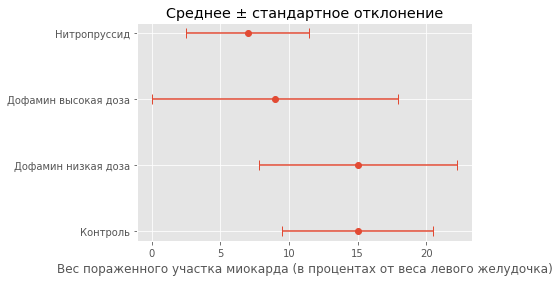

In [51]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Вес пораженного участка миокарда (в процентах от веса левого желудочка)");

In [52]:
F_test(df["n"], df["mean"], df["std"])

Межгрупповая дисперсия: MSbg = 351.807
Внутригрупповая дисперсия: MSwg = 42.962

F = MSbg / MSwg = 8.189

Межгрупповое число степеней свободы: vbg = 3
Внутригрупповое число степеней свободы: vwg = 79

Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: 
	 F01 = 4.040 
	 F05 = 2.720

Различия статистически значимы. P < 0.01 (F = 8.189 > F01 = 4.040)


**3.8.**

Считается, что выработка тромбоцитов (форменных элементов крови, играющих важную роль в ее свертывании) у новорожденных регулируется иначе чем у взрослых. Исследуя эту регуляцию X. Бесслер и соавт. (Н. Bessler et al. Thrombopoietic activity in newborn infants. Biol. Neonate, 49:61—65, 1986) опрeделили содержание тромбоцитов в крови взрослых и грудных детей  разного  возраста.  Можно  ли  говорить  о  существовании различии в количестве тромбоцитов?

Группа|Число обследованных|Среднее число тромбоцитов, мкл–1|Стандартное отклонение
-|-|-|-
Взрослые|15|257|159
Дети в возрасте 4 суток|37|196|359
Дети в возрасте 1 месяца|31|221|340
Дети в возрасте 2 месяцев|13|280|263
Дети в возрасте 4 месяцев|10|310|95

In [53]:
df = pd.DataFrame(
    data=[[15, 257, 159], [37, 196, 359], [31, 221, 340], [13, 280, 263], [10, 310, 95]],
    index=["Взрослые"] + [f"Дети в возрасте {x}" for x in ["4 суток", "1 месяца", "2 месяцев", "4 месяцев"]],
    columns=["n", "mean", "std"] 
)

display(df)

,n,mean,std
Взрослые,15,257,159
Дети в возрасте 4 суток,37,196,359
Дети в возрасте 1 месяца,31,221,340
Дети в возрасте 2 месяцев,13,280,263
Дети в возрасте 4 месяцев,10,310,95


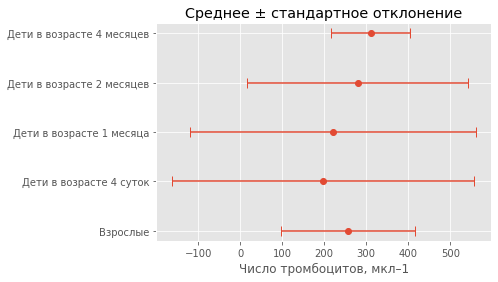

In [54]:
fig, ax = plt.subplots()

plt.errorbar(x=df["mean"], y=df.index, xerr=df["std"], fmt='o', capsize=5);

ax.set_title("Среднее \u00b1 стандартное отклонение");
ax.set_xlabel("Число тромбоцитов, мкл–1");

In [55]:
F_test(df["n"], df["mean"], df["std"])

Межгрупповая дисперсия: MSbg = 37941.000
Внутригрупповая дисперсия: MSwg = 92801.020

F = MSbg / MSwg = 0.409

Межгрупповое число степеней свободы: vbg = 4
Внутригрупповое число степеней свободы: vwg = 101

Критический значение для заданного числа степеней сввободы и уровней значимости 0.01 и 0.05: 
	 F01 = 3.511 
	 F05 = 2.462

Различия статистически не значимы. P > 0.05 (F = 0.409 < F05 = 2.462)
